# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
medical = pd.read_csv('insurance2.csv')

C:\Users\nicho\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\nicho\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\nicho\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
medical.shape

(1338, 8)

In [3]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


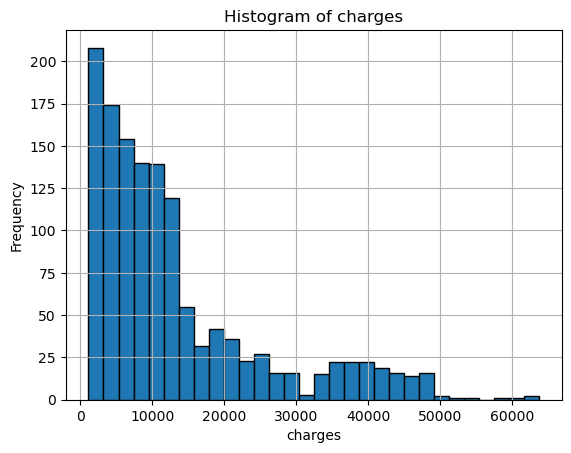

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed

# Read the CSV file into a DataFrame
medical = pd.read_csv('insurance2.csv')

# Select a column from the DataFrame for which you want to create a histogram
selected_column = 'charges'

# Create histogram
plt.hist(medical[selected_column], bins=30, edgecolor='black')  # Adjust bins as per your preference
plt.title('Histogram of {}'.format('charges'))
plt.xlabel(selected_column)
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

In [8]:
import pandas as pd

# Read the CSV file into a DataFrame
medical = pd.read_csv('insurance2.csv')

# Select a column for which you want to calculate mean and standard deviation
selected_column = 'charges'

# Calculate mean and standard deviation
mean = medical[selected_column].mean()
std_dev = medical[selected_column].std()

print("Mean of {}: {}".format('charges', mean))
print("Standard deviation of {}: {}".format('charges', std_dev))

Mean of charges: 13270.422265141257
Standard deviation of charges: 12110.011236693994


__A:__
Mean of charges: 13270.422265141257
Standard deviation of charges: 12110.01123

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:A one-sample t-test can be conducted to determine whether the mean charge is significantly different from $12,000. One would set up the null and alternative hypotheses:

Null Hypothesis: The mean charge is $12,000
Alternative Hypothesis: The mean charge is not $12,000

Next, calculate the t-statistic and compare it to the critical t-value from the t-distribution with appropriate degrees of freedom to eighter accept or reject the null hypithesis.

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__A one-sided interval is most appropriate. One needs to find the critical value corresponding to the 95th percentile of the t-distributino with degrees of freedom equal to the sample size minus 1.

In [9]:
import scipy.stats as stats

# Given data
mean_charge = 13270.42  # Mean charge from the data
std_dev = 12110.01      # Standard deviation of charges from the data
n = len(medical)        # Sample size (assuming the entire dataset is used)

# Critical value for a one-sided 95% confidence interval
# Degrees of freedom: n - 1
# We use the ppf (percent point function) to find the critical value
# For a one-sided interval, we use the upper tail
# Since we want the lower bound, we negate the critical value
critical_value = -stats.t.ppf(0.05, df=n-1)

# Margin of error (using standard error since population standard deviation is unknown)
standard_error = std_dev / (n ** 0.5)
margin_of_error = critical_value * standard_error

# Calculate the lower bound of the one-sided 95% confidence interval
lower_bound = mean_charge + margin_of_error

print("Critical value for the one-sided 95% confidence interval:", critical_value)
print("Margin of error:", margin_of_error)
print("Lower bound of the one-sided 95% confidence interval:", lower_bound)

Critical value for the one-sided 95% confidence interval: 1.6459941145571324
Margin of error: 544.9350256753708
Lower bound of the one-sided 95% confidence interval: 13815.355025675372


The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__Null Hypothesis: The mean charge is $12,000
Alternative Hypothesis: The mean charge is not $12,000

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

In [10]:
import scipy.stats as stats

# Given data
mean_charge = 13270.42  # Mean charge from the data
std_dev = 12110.01      # Standard deviation of charges from the data
n = len(medical)        # Sample size (assuming the entire dataset is used)
hypothesized_mean = 12000  # Hypothesized population mean

# Calculate the t-statistic
t_statistic = (mean_charge - hypothesized_mean) / (std_dev / (n ** 0.5))

# Degrees of freedom: n - 1
degrees_of_freedom = n - 1

# Calculate the p-value for the one-sided test
# We use the sf (survival function) since it's a one-sided test
p_value = stats.t.sf(t_statistic, df=degrees_of_freedom)

print("t-statistic:", t_statistic)
print("p-value:", p_value)

t-statistic: 3.8373452696017134
p-value: 6.50875162849296e-05


__A:__ 

In [ ]:
t= (13270.42-12000)/12110.01/squareroot 'n'

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__The z test is used when the population parameters are known. scipy: 'scipy.stats.norm.ppf()'

Most of the time population parameters are not known- therefore the t-test is used.

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test